In [1]:
import pandas as pd
import numpy as np

In [81]:
df = pd.read_csv("final_dataset.csv")

In [52]:
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

df = df[['Date','total_trips']]
df

,Date,total_trips
0,2013-06-01,8722
1,2013-06-02,15971
2,2013-06-03,7598
3,2013-06-04,15782
4,2013-06-05,15690
...,...,...
3437,2022-12-27,33044
3438,2022-12-28,44027
3439,2022-12-29,51674
3440,2022-12-30,62298


In [53]:
df.groupby('Date')['total_trips'].sum()

Date
2013-06-01     8722
2013-06-02    15971
2013-06-03     7598
2013-06-04    15782
2013-06-05    15690
              ...  
2022-12-27    33044
2022-12-28    44027
2022-12-29    51674
2022-12-30    62298
2022-12-31    31466
Name: total_trips, Length: 3442, dtype: int64

In [54]:
# Rename the 'Unnamed: 0' column to 'Date' and update df
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Check the first few rows to verify the renaming
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Date' and sum the 'total_trips' for each date
df = df.groupby('Date')['total_trips'].sum()

df = df.asfreq(pd.infer_freq(df.index))

df

Date
2013-06-01     8722.0
2013-06-02    15971.0
2013-06-03     7598.0
2013-06-04    15782.0
2013-06-05    15690.0
               ...   
2022-12-27    33044.0
2022-12-28    44027.0
2022-12-29    51674.0
2022-12-30    62298.0
2022-12-31    31466.0
Freq: D, Name: total_trips, Length: 3501, dtype: float64

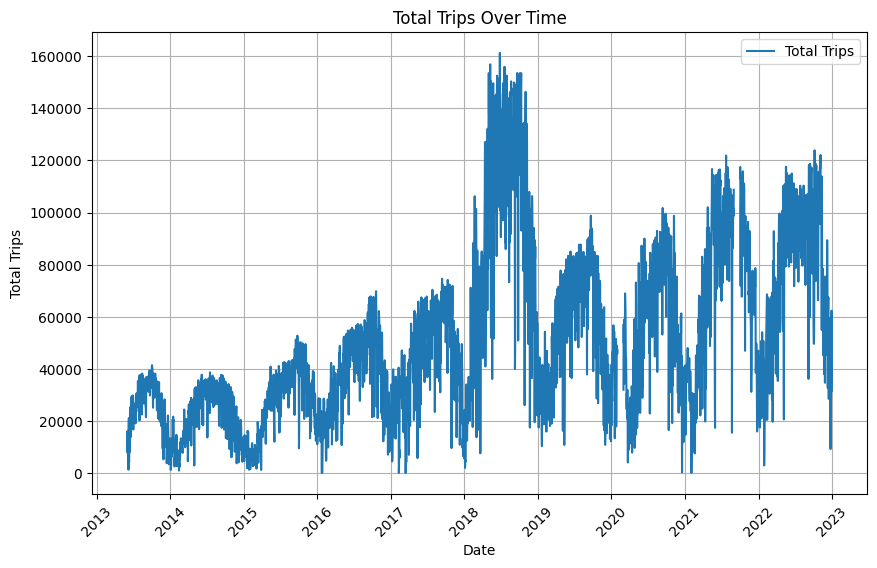

In [55]:
import matplotlib.pyplot as plt

# Plot the 'total_trips' column (which is now the series after grouping by Date)
plt.figure(figsize=(10, 6))  # Optional: to adjust the figure size
plt.plot(df.index, df, label='Total Trips')  # Plot 'total_trips' over time
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Total Trips')  # Label for y-axis
plt.title('Total Trips Over Time')  # Title for the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Display grid lines
plt.show()  # Show the plot

In [56]:
# Check for missing values
print(df.isna().sum())

# Fill or drop missing values
df = df.fillna(method='ffill')  # Forward fill missing values
# Or
df = df.dropna()  # Drop rows with missing values


59


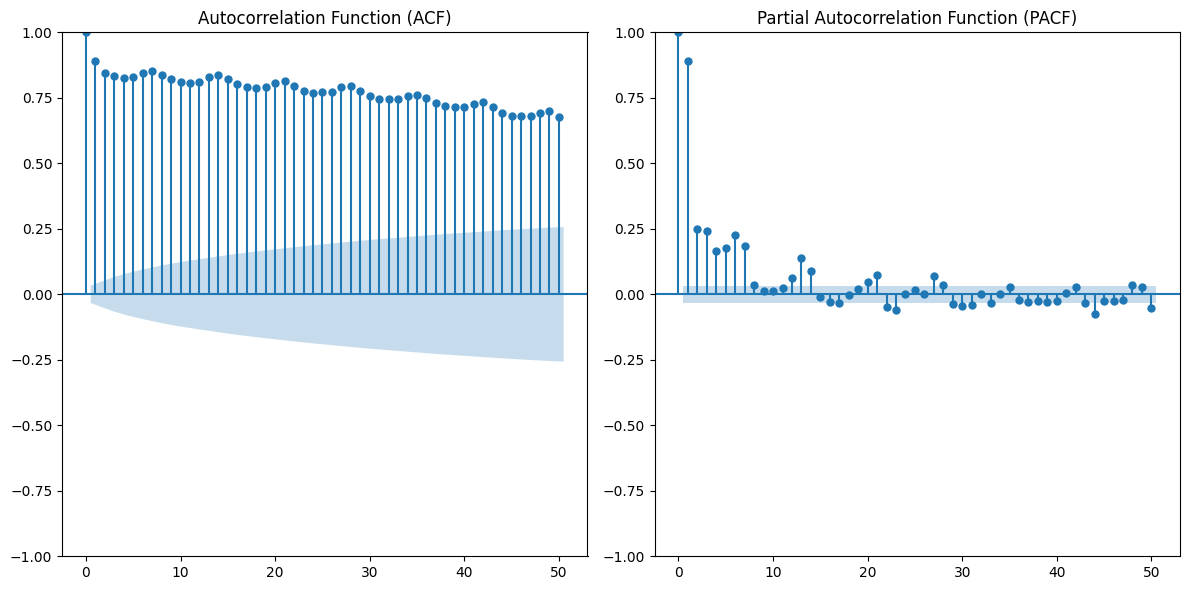

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create a subplot for ACF
plot_acf(df, lags=50, ax=plt.gca())  # ACF plot for 50 lags
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(1, 2, 2)  # Create a subplot for PACF
plot_pacf(df, lags=50, ax=plt.gca(), method='ywm')  # PACF plot for 50 lags
plt.title('Partial Autocorrelation Function (PACF)')

# Show the plots
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()

In [63]:
from datetime import datetime, timedelta  # Import datetime and timedelta

train_end = datetime(2021,12,1)
test_end = datetime(2022,12,1)

train_data = df[:train_end]
test_data = df[train_end + timedelta(days=1):test_end]

In [72]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARMA model (ARIMA with p=3, d=0, q=0)
model = ARIMA(train_data, order=(3, 0, 0))  # p=3, d=0 (for ARMA), q=0
model_fit = model.fit()

# Print the summary of the fitted model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:            total_trips   No. Observations:                 3106
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -34013.869
Date:                Thu, 14 Nov 2024   AIC                          68037.739
Time:                        19:03:59   BIC                          68067.944
Sample:                    06-01-2013   HQIC                         68048.585
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.956e+04   4852.152     10.213      0.000       4e+04    5.91e+04
ar.L1          0.5995      0.011     54.272      0.000       0.578       0.621
ar.L2          0.0922      0.013      7.322      0.0

In [75]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [76]:
predictions = model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals = test_data - predictions

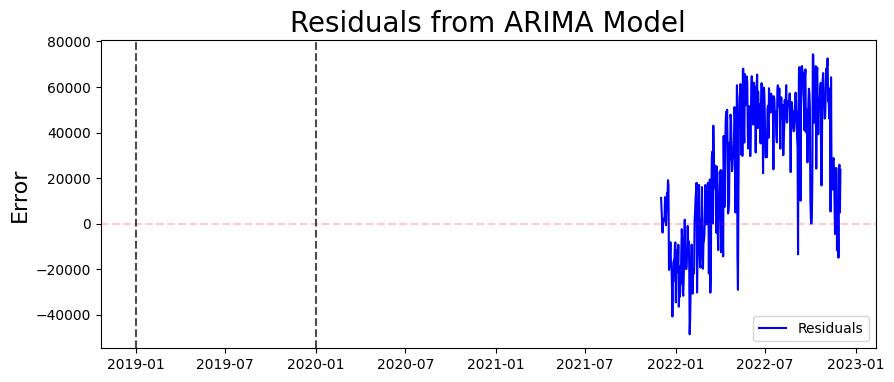

In [77]:
# Plot the residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals, label='Residuals', color='blue')
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

# Add vertical lines for the years 2019 and 2020
for year in range(2019, 2021):
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color='k', linestyle='--', alpha=0.7)

plt.legend()
plt.show()

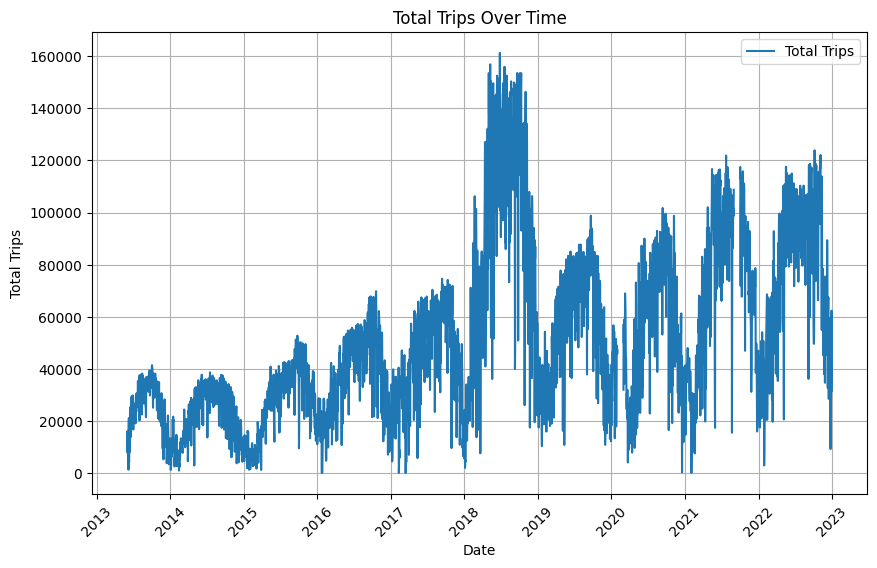

59


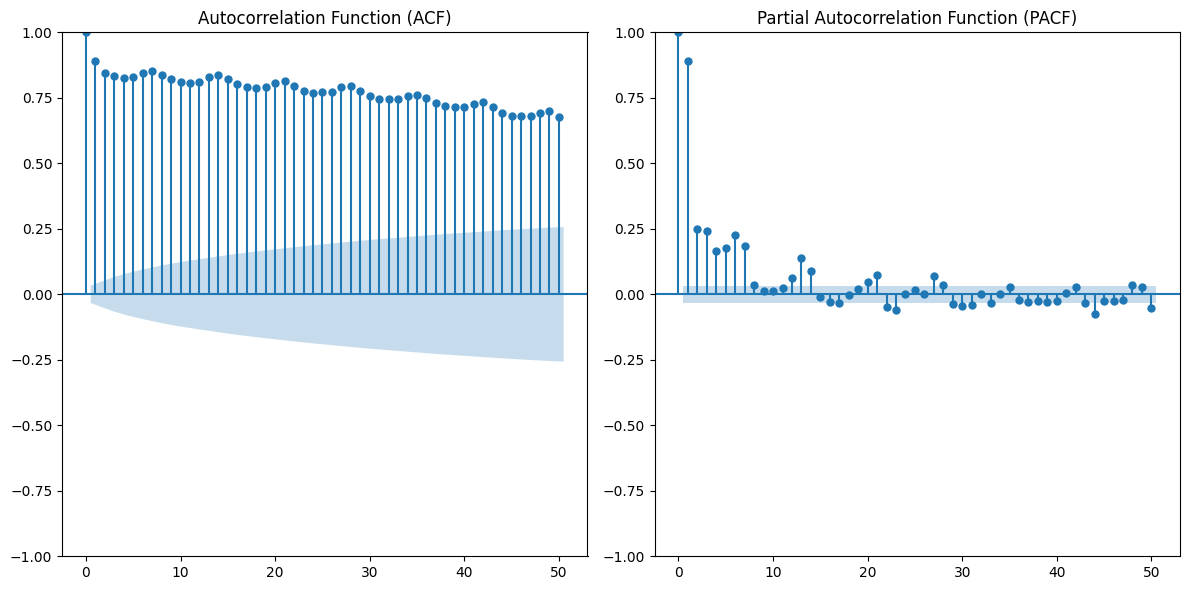

                               SARIMAX Results                                
Dep. Variable:            total_trips   No. Observations:                 3106
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -34013.869
Date:                Thu, 14 Nov 2024   AIC                          68037.739
Time:                        19:11:04   BIC                          68067.944
Sample:                    06-01-2013   HQIC                         68048.585
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.956e+04   4852.152     10.213      0.000       4e+04    5.91e+04
ar.L1          0.5995      0.011     54.272      0.000       0.578       0.621
ar.L2          0.0922      0.013      7.322      0.0

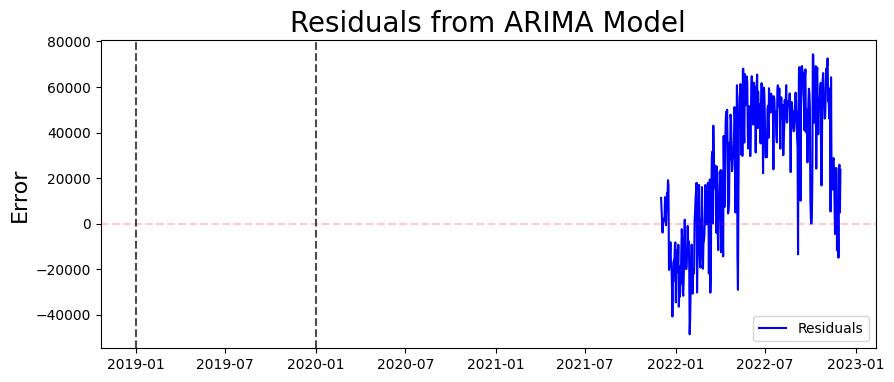

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

# Load the dataset
df = pd.read_csv("final_dataset.csv")

# Rename 'Unnamed: 0' column to 'Date'
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Date' and sum the 'total_trips' for each date
df = df.groupby('Date')['total_trips'].sum()

# Set the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df, label='Total Trips')
plt.xlabel('Date')
plt.ylabel('Total Trips')
plt.title('Total Trips Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Check for missing values and fill or drop them
print(df.isna().sum())
df = df.fillna(method='ffill')  # Forward fill missing values

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(df, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(df, lags=50, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Train-test split
train_end = datetime(2022, 12, 1)
test_end = datetime(2023, 12, 1)

train_data = df[:train_end]
test_data = df[train_end + timedelta(days=1):test_end]

# Fit the ARIMA model (ARIMA with p=3, d=0, q=0)
model = ARIMA(train_data, order=(3, 0, 0))  # p=3, d=0, q=0 (ARMA model)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Generate predictions on the test data
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

# Calculate residuals (differences between actual and predicted values)
residuals = test_data - predictions

# Plot the residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals, label='Residuals', color='blue')
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

# Add vertical lines for the years 2019 and 2020
for year in range(20, 2021):
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color='k', linestyle='--', alpha=0.7)

plt.legend()
plt.show()


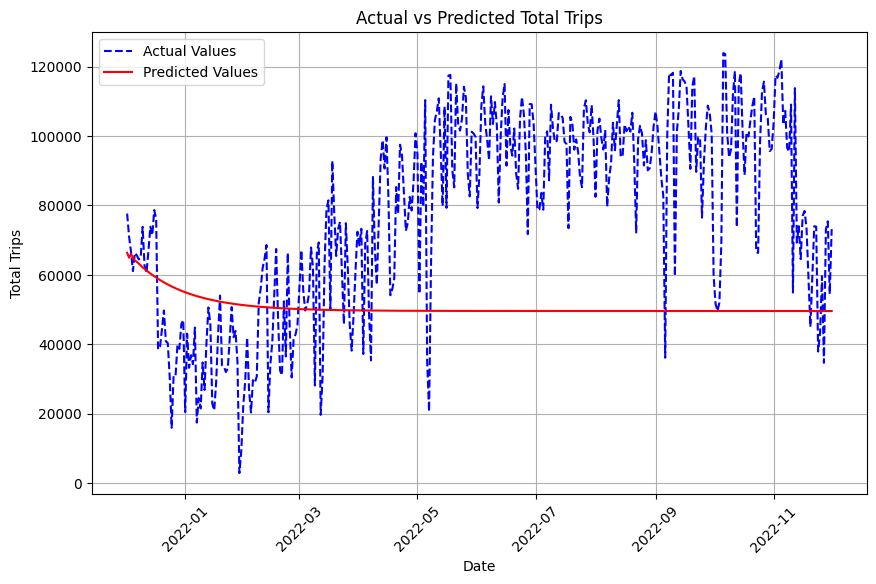

In [79]:
# Generate predictions on the test data
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(test_data.index, test_data, label='Actual Values', color='blue', linestyle='--')

# Plot predicted values
plt.plot(test_data.index, predictions, label='Predicted Values', color='red', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Trips')
plt.title('Actual vs Predicted Total Trips')
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.show()


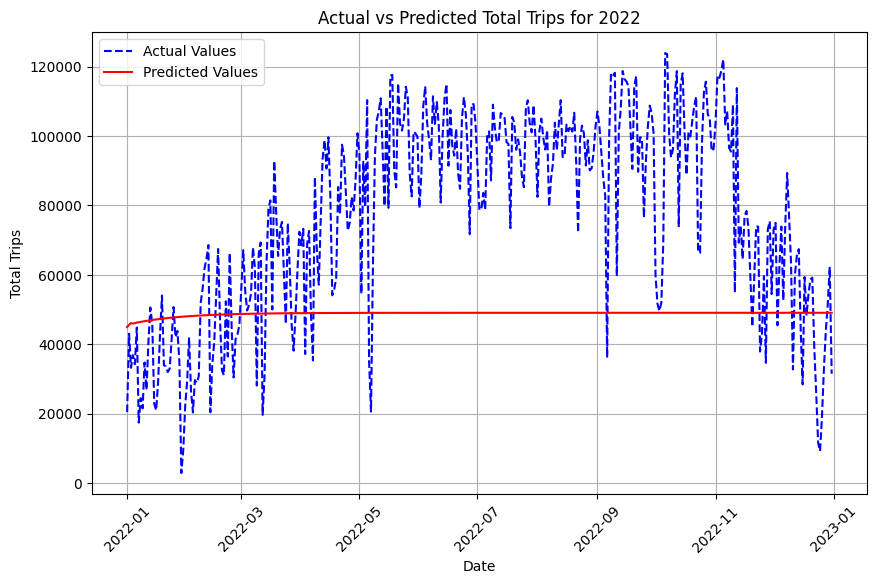

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Read and preprocess the dataset
df = pd.read_csv("final_dataset.csv")

# Rename the 'Unnamed: 0' column to 'Date' and convert it to datetime
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

# Select 'Date' and 'total_trips' columns and group by 'Date'
df = df[['Date', 'total_trips']]
df = df.groupby('Date')['total_trips'].sum()

# Step 2: Ensure the data is in the correct frequency (if needed)
df = df.asfreq(pd.infer_freq(df.index))

# Step 3: Split data into training and testing datasets
train_end = datetime(2021, 12, 31)  # Use data until the end of 2021 for training
test_end = datetime(2022, 12, 31)  # Entire 2022 for testing

train_data = df[:train_end]  # Training data
test_data = df[train_end + timedelta(days=1):test_end]  # Testing data (2022)

# Step 4: Fit ARIMA model on training data
model = ARIMA(train_data, order=(3, 0, 0))  # ARIMA(p=3, d=0, q=0)
model_fit = model.fit()

# Step 5: Generate predictions on the test data (2022)
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Step 6: Plot actual values vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual values (2022 test data)
plt.plot(test_data.index, test_data, label='Actual Values', color='blue', linestyle='--')

# Plot predicted values (from ARIMA model)
plt.plot(test_data.index, predictions, label='Predicted Values', color='red', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Trips')
plt.title('Actual vs Predicted Total Trips for 2022')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display grid and show the plot
plt.grid(True)
plt.show()
